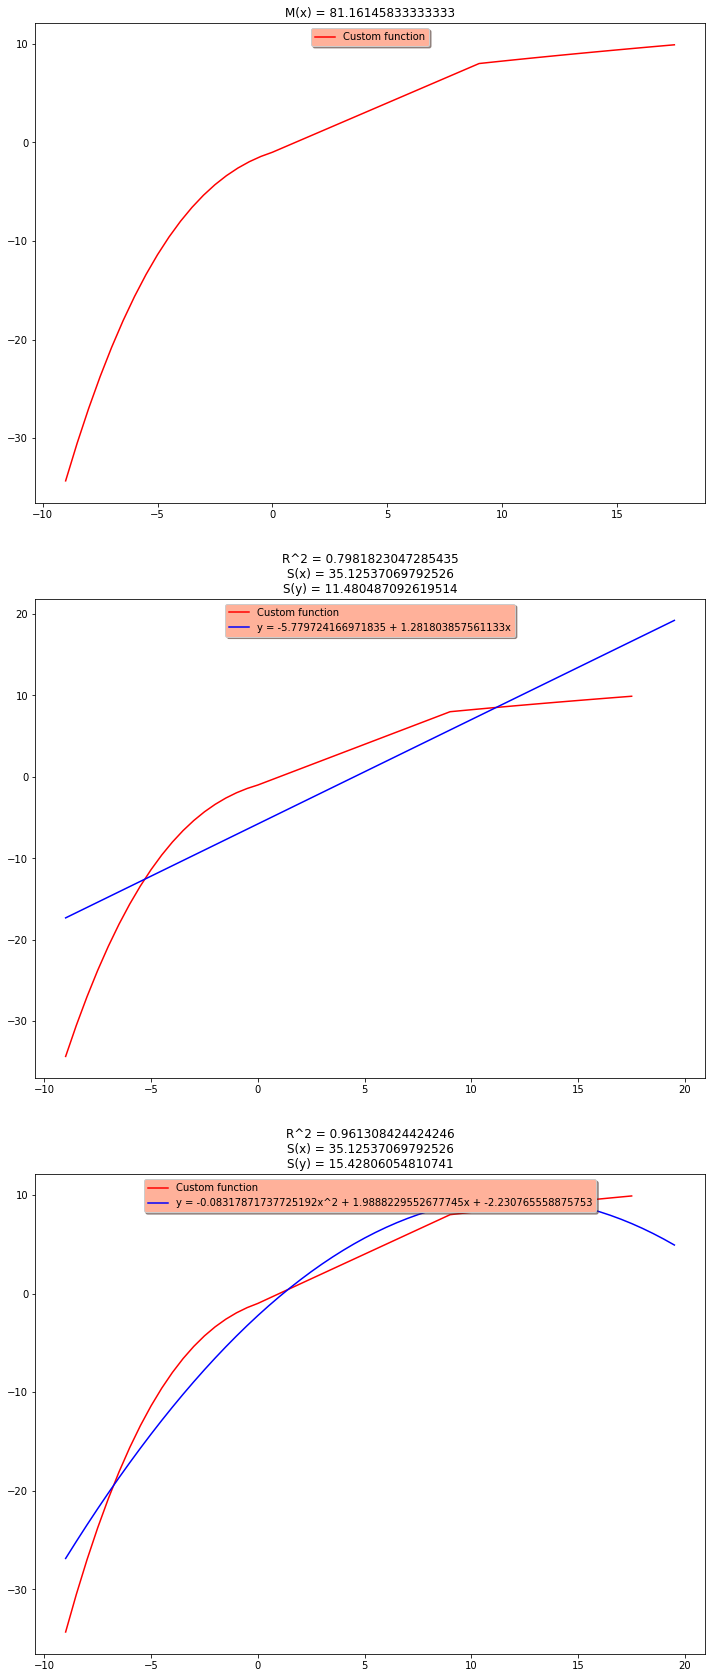

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def get_r_2 (x_list, y_list, koef, func = lambda x: x):
    """
    Функция для расчета коэффициент детерминации R^2
    """
    if len(koef) == 2:
        a, b = koef
        n = len(y_list)
        y_middle = sum(y_list) / n
        upper = sum([(y - func(x, a, b))**2 for y, x in zip(y_list, x_list)])
        lower = sum([(y - y_middle)**2 for y in y_list])
        R = upper / lower
    elif len(koef) == 3:
        a, b, c = koef
        n = len(y_list)
        y_middle = sum(y_list) / n
        upper = sum([(y - func(x, a, b, c))**2 for y, x in zip(y_list, x_list)])
        lower = sum([(y - y_middle)**2 for y in y_list])
        R = upper / lower
    return 1 - R

def get_koef_lineal (x_list, y_list, x_func = lambda x: x, y_func = lambda y: y):
    """
    Функция для получения коэфициетов a и b для уравнений типа a + bx
    """
    n = len(x_list)
    sum_x = sum([x_func(x) for x in x_list])
    sum_y = sum([y_func(y) for y in y_list])
    sum_x2 = sum([x_func(x)**2 for x in x_list])
    sum_xy = sum([x_func(x)*y_func(y) for x, y in zip(x_list, y_list)])
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    a = (sum_y - b * sum_x) / (n)
    
    return a, b


def get_koef_polin (x_list, y_list):
    """
    Функция для получения коэфициетов a и b для уравнений типа ax^2 + bx + c
    """
    n = len(x_list)
    sum_x = sum([x for x in x_list])
    sum_y = sum([y for y in y_list])
    sum_x2 = sum([x ** 2 for x in x_list])
    sum_xy = sum([x * y for x, y in zip(x_list, y_list)])
    sum_x3 = sum([x ** 3 for x in x_list])
    sum_x4 = sum([x ** 4 for x in x_list])
    sum_x2y = sum([(x ** 2) * y for x, y in zip(x_list, y_list)])
    M1 = np.array([[n, sum_x, sum_x2],[sum_x, sum_x2, sum_x3],[sum_x2, sum_x3, sum_x4]])
    V1 = np.array([sum_y, sum_xy, sum_x2y])
    a, b, c = np.linalg.solve(M1, V1)
    return c, b, a



def get_sr_otkl(x_list, y_list, x_func = lambda x: x, y_func = lambda y: y):
    """
    Функция для вычисления величины среднего квадратичного отклонения S(x) и S(y)
    """
    n = len(x_list)
    sum_x = sum([x_func(x) for x in x_list][::5])
    sum_y = sum([y_func(y) for y in y_list][::5])
    otkl_x = (sum([(x - sum_x) ** 2 for x in x_list]) / n) ** 0.5
    otkl_y = (sum([(y - sum_y) ** 2 for y in y_list]) / n) ** 0.5
    return otkl_x, otkl_y


X_MIN = -9                                                                  #Инициализация констант
X_MAX = 18                                                                #все (ну почти) обьявлены капсом
X_1 = 0                                                                    #строго по PEP8 :3
X_2 = 9
H = 0.5
F1 = lambda x: (x / 4 - 1) ** 3
F1_integral = lambda x: (3 * (8 * x ** 2 - (8 * x ** 3) / 3 + x ** 4 / 4))/64
F2 = lambda x: x - 1
F2_integral = lambda x: (x ** 2) / 2
F3 = lambda x: 2 * (abs(x + 7)) ** 0.5
F3_integral = lambda x: (2/3) * (x - 14) * (x + 7) ** 0.5
linear_function = lambda x, a, b: a + b * x
polim_function = lambda x, a, b, c: a * x ** 2 + b * x + c
FUNCTION_LIST = [F1, F2, F3]
INTEGRATED_FUNCTION_LIST = [F1_integral, F2_integral, F3_integral]
X_INTERVALS_LIST = [X_MIN, X_1, X_2, X_MAX]
X_LIST = [(x/10) for index in range(3) for x in range(X_INTERVALS_LIST[index]*10, int(X_INTERVALS_LIST[index+1]*10), int(H*10))]
Y_LIST = [FUNCTION_LIST[index](x/10) for index in range(3) for x in range(X_INTERVALS_LIST[index]*10, int(X_INTERVALS_LIST[index+1]*10), int(H*10))]
N = len(X_LIST)


#Начало основной программы

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1,                   #объявление обекта Figure (переменная fig)
    figsize=(12, 30)                    #и nparray из обьектов Axes (переменные ax1, ax2, ax3)
)

#Вычисляем математическое ожидание для частично непрерывной функции T-T
mat_o = 0                       #если чо, то можешь написать @immortalban0 за обьяснением как это делать >-<
for index in range(3):
    opr_integ = INTEGRATED_FUNCTION_LIST[index](X_INTERVALS_LIST[index + 1]) - FUNCTION_LIST[index](X_INTERVALS_LIST[index])
    mat_o += opr_integ
 
ax1.plot (X_LIST, Y_LIST, 'r')                                              #работа с первым графиком(ax1)
ax1.set_title(f'M(x) = {mat_o}')                                            #изображен просто график кастомной функции
lgnd1 = ax1.legend(['Custom function'], loc='upper center', shadow=True)    #как в варианте
lgnd1.get_frame().set_facecolor('#ffb19a')

               
X_INTERVALS_LIST[3] = X_MAX + 2
new_X_LIST = [(x/10) for index in range(3) for x in range(X_INTERVALS_LIST[index]*10, int(X_INTERVALS_LIST[index+1]*10), int(H*10))]
new_Y_LIST = [FUNCTION_LIST[index](x/10) for index in range(3) for x in range(X_INTERVALS_LIST[index]*10, int(X_INTERVALS_LIST[index+1]*10), int(H*10))]
               

a1, b1 = get_koef_lineal(X_LIST, Y_LIST)                                           #получаем коэфициеты
y_trend = [linear_function(x, a1, b1) for x in new_X_LIST]                      #создаем список значений у для линейной функции типа a + bx
R_1 = get_r_2(X_LIST, Y_LIST, [a1, b1], func = linear_function)               #получаем коэф. детерминации и среднее отклонение
otkl_x1, otkl_y1 = get_sr_otkl(X_LIST, y_trend)
ax2.plot(X_LIST, Y_LIST, 'r', new_X_LIST, y_trend, 'b', linestyle='solid')      #рисуем график (даже два), "r" и "b" это цвета если чо
ax2.set_title(f'R^2 = {R_1}\nS(x) = {otkl_x1}\nS(y) = {otkl_y1}')           #делаем заголовочек @-@
lgnd2 = ax2.legend(['Custom function', f'y = {a1} + {b1}x'], loc='upper center', shadow=True)
lgnd2.get_frame().set_facecolor('#ffb19a')


a2, b2, c2 = get_koef_polin(X_LIST, Y_LIST)                                         #тут впринципе то же самое, только 
y_trend2 = [polim_function(x, a2, b2, c2) for x in new_X_LIST]                       #системка из 3х уравнений
R_2 = get_r_2(X_LIST, Y_LIST, [a2, b2, c2], func = polim_function)                 #а не из двух как в линейной функции
otkl_x2, otkl_y2 = get_sr_otkl(X_LIST, y_trend2)
ax3.plot(X_LIST, Y_LIST, 'r', new_X_LIST, y_trend2, 'b', linestyle='solid')
ax3.set_title(f'R^2 = {R_2}\nS(x) = {otkl_x2}\nS(y) = {otkl_y2}')
lgnd3 = ax3.legend(['Custom function', f'y = {a2}x^2 + {b2}x + {c2}'], loc='upper center', shadow=True)
lgnd3.get_frame().set_facecolor('#ffb19a')                